---
## Simple linear regression <br> <font size=3.4> Dataset:delivery_time.csv<br><font size=2>Build simple linear regression model by performing Exploratory Data Analysis and do necessary transformations and select the best model using Python or R,Predict delivery time using sorting time
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('delivery_time.csv')

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df1= df.rename({'Delivery Time':'DT','Sorting Time':'ST'}, axis=1)

In [5]:
df1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


## Cheking for outliers

<AxesSubplot:xlabel='DT'>

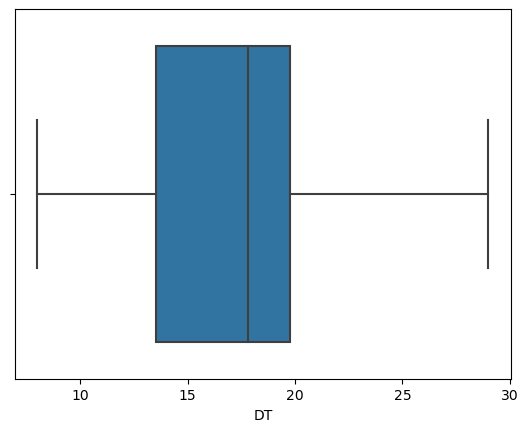

In [6]:
sns.boxplot(x='DT', data=df1)

<AxesSubplot:xlabel='ST'>

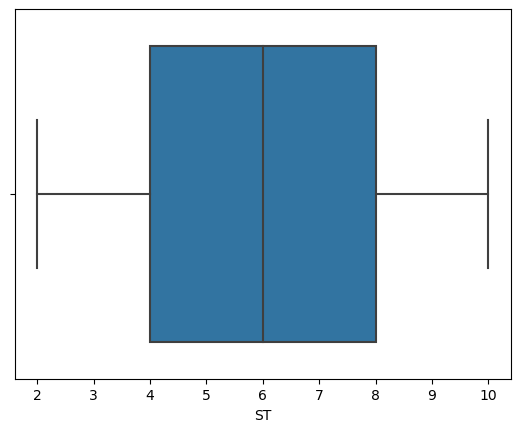

In [7]:
sns.boxplot(x='ST', data=df1)

<AxesSubplot:xlabel='DT', ylabel='Count'>

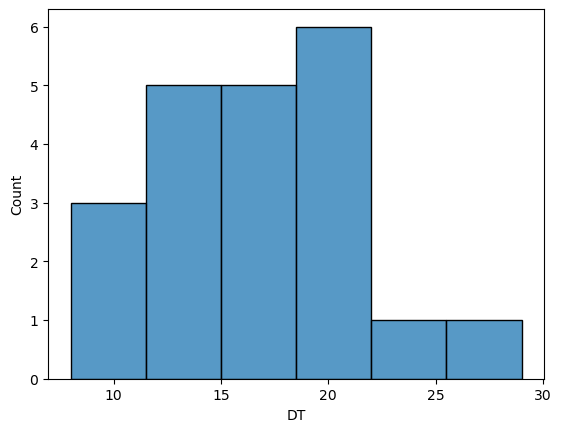

In [8]:
sns.histplot(df1.DT)

<AxesSubplot:xlabel='ST', ylabel='Count'>

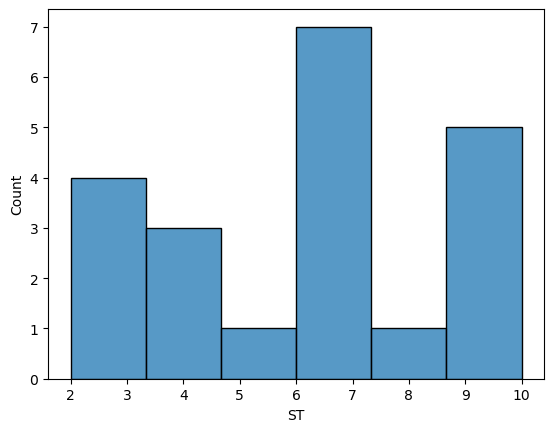

In [9]:
sns.histplot(df1.ST)

## Checking for duplicated rows

In [10]:
df1[df1.duplicated()].shape

(0, 2)

## Building the model

In [11]:
model = smf.ols("DT~ST", data=df1).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

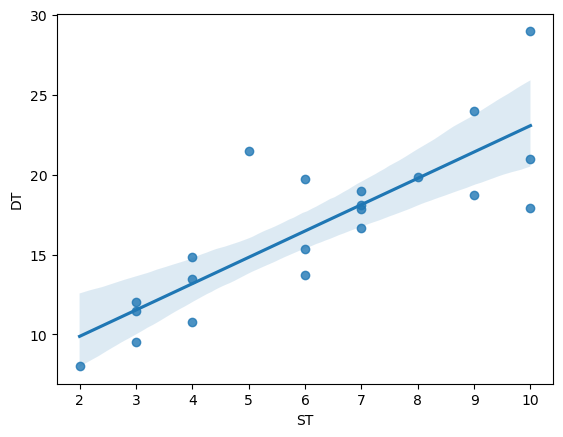

In [12]:
sns.regplot(x='ST', y='DT', data=df1)

In [13]:
print('P value is:', model.pvalues, '\n', '\n', 'Rsquared value is:',model.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model.rsquared )

P value is: Intercept    0.001147
ST           0.000004
dtype: float64 
 
 Rsquared value is: 0.6822714748417231 
 
 Adjusted Rsquared value is: 0.6822714748417231


### Iteration 1

In [14]:
df1['ST2'] = df1['ST']**2

In [15]:
df1.head(3)

,DT,ST,ST2
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36


In [16]:
model1= smf.ols('DT~ST2', data=df1).fit()

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.74e-05
Time:                        19:29:50   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2372      1.196      9.399      0.000       8.735      13.740
ST2            0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Since R squared value is again less, trying another alternative

In [20]:
model2= smf.ols('DT~ST+ST2', data=df1).fit()

In [21]:
print('P value is:', model2.pvalues, '\n', '\n', 'Rsquared value is:',model2.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model2.rsquared )

P value is: Intercept    0.408248
ST           0.070097
ST2          0.428641
dtype: float64 
 
 Rsquared value is: 0.6934396274520248 
 
 Adjusted Rsquared value is: 0.6934396274520248


In [22]:
#R squared value is still less.

### Itertion 2

In [23]:
df1['logST'] = np.log(df1['ST'])

In [24]:
df1.head(3)

,DT,ST,ST2,logST
0,21.00,10,100,2.302585
1,13.50,4,16,1.386294
2,19.75,6,36,1.791759


In [25]:
model3= smf.ols('DT~logST', data=df1).fit()

In [26]:
model3.summary()
# print('P value is:', model3.pvalues, '\n', '\n', 'Rsquared value is:',model3.rsquared, 
#       '\n', '\n','Adjusted Rsquared value is:', model3.rsquared )

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        19:30:41   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
logST          9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#R squared value is still less.

### Iteration 3

In [28]:
df1['sqrtST'] = df1['ST']**(1/2)

In [29]:
df1.head()

,DT,ST,ST2,logST,sqrtST
0,21.00,10,100,2.302585,3.162278
1,13.50,4,16,1.386294,2.000000
2,19.75,6,36,1.791759,2.449490
3,24.00,9,81,2.197225,3.000000
4,29.00,10,100,2.302585,3.162278


In [30]:
model4= smf.ols('DT~sqrtST', data=df1).fit()

In [31]:
model4.summary()
# print('P value is:', model4.pvalues, '\n', '\n', 'Rsquared value is:',model4.rsquared, 
#       '\n', '\n','Adjusted Rsquared value is:', model4.rsquared )

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           2.61e-06
Time:                        19:31:37   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrtST         7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#R squared value is still less.

In [33]:
#Since the variable transformation doesn't seem to show enough improvement on r squared value, hence, we'll 
#try for model deletion diagnostics

### Model deletion diagnostics<br> Cook's distance

### Interation 4

In [34]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

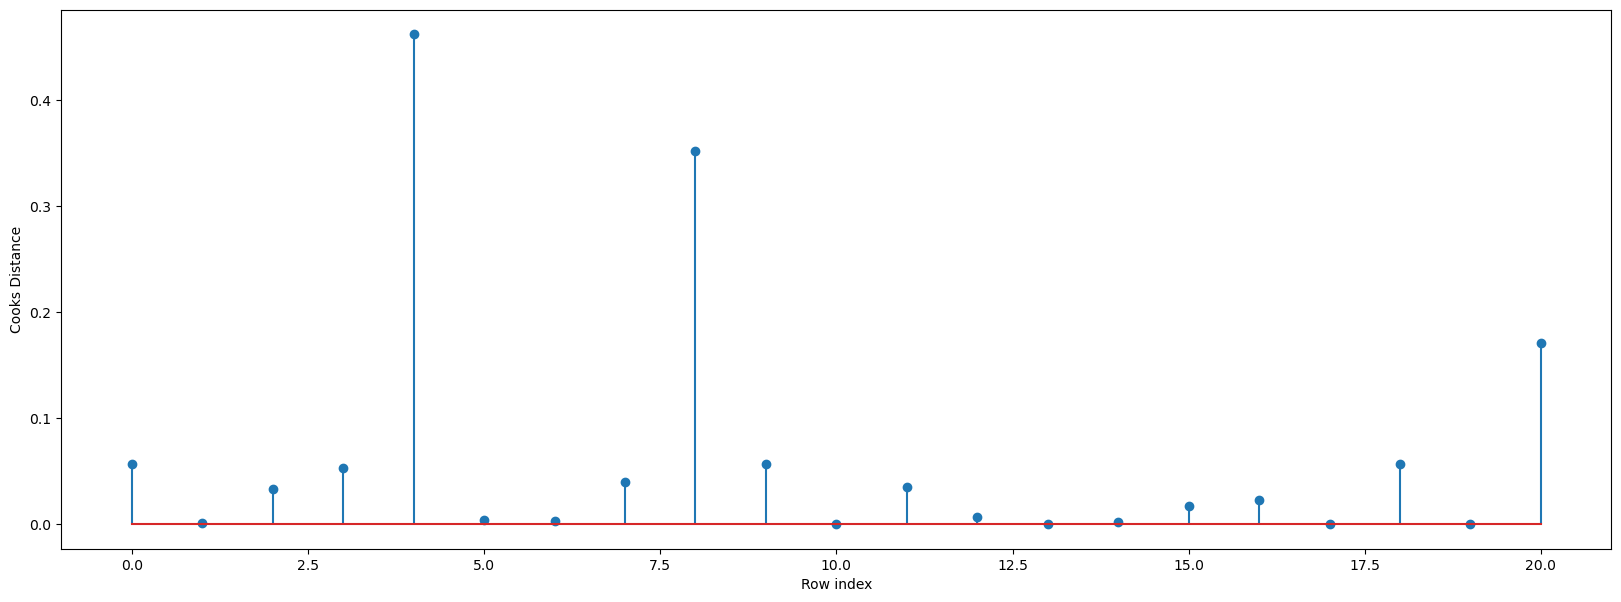

In [35]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
np.argmax(c), np.max(c)

(4, 0.4620530412650316)

In [37]:
df2= df1.drop([4],axis=0)

In [38]:
df3 = df2.reset_index()

In [39]:
df4 = df3.drop(['index'],axis=1)

In [40]:
model5 = smf.ols('DT~ST', data=df4).fit()

In [41]:
model5.summary()
# print('P value is:', model5.pvalues, '\n', '\n', 'Rsquared value is:',model5.rsquared, 
#       '\n', '\n','Adjusted Rsquared value is:', model5.rsquared )

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     34.97
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.35e-05
Time:                        19:32:33   Log-Likelihood:                -46.449
No. Observations:                  20   AIC:                             96.90
Df Residuals:                      18   BIC:                             98.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5342      1.574      4.788      0.000       4.228      10.840
ST             1.4411      0.244      5.914      0.000       0.929       1.953
==============================================================================
Omnibus:                        5.574   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.289
Skew:                           0.906   Prob(JB):                        0.193
Kurtosis:                       3.816   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Iteration 5

In [42]:
model_influence = model5.get_influence()
(c1, _) = model_influence.cooks_distance

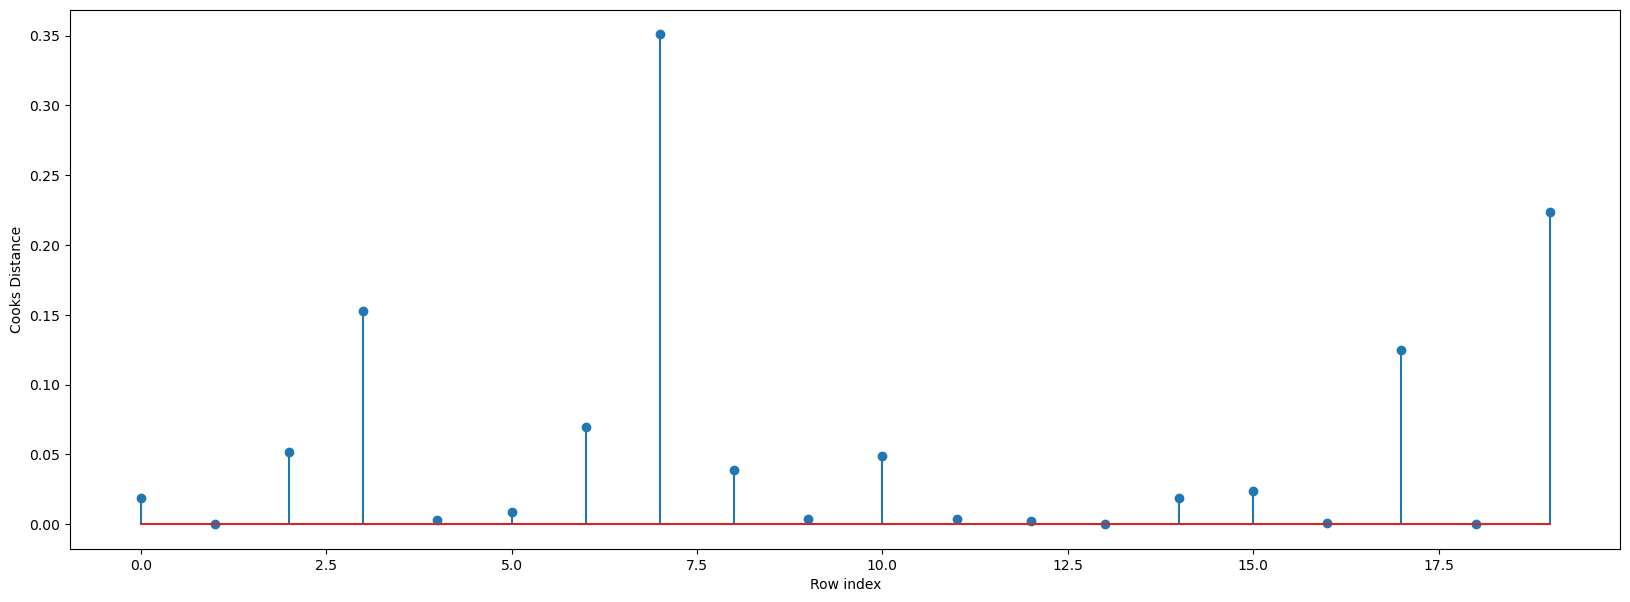

In [43]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df4)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
np.argmax(c1), np.max(c1)

(7, 0.3508974803877879)

In [45]:
df5= df4.drop([7],axis=0)

In [46]:
df6= df5.reset_index()

In [47]:
df7= df6.drop(['index'], axis=1)

In [49]:
model6= smf.ols('DT~ST', data=df7).fit()

In [50]:
model6.summary()
# print('P value is:', model6.pvalues, '\n', '\n', 'Rsquared value is:',model6.rsquared, 
#       '\n', '\n','Adjusted Rsquared value is:', model6.rsquared )

C:\Users\mruna\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     42.46
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           5.28e-06
Time:                        19:33:53   Log-Likelihood:                -42.891
No. Observations:                  19   AIC:                             89.78
Df Residuals:                      17   BIC:                             91.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7323      1.542      4.366      0.000       3.479       9.985
ST             1.6163      0.248      6.516      0.000       1.093       2.140
==============================================================================
Omnibus:                        8.911   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                6.059
Skew:                           1.208   Prob(JB):                       0.0483
Kurtosis:                       4.347   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Since r squared value has increased, we'll try eliminating another influence point

### Iteration 6

In [52]:
model_influence = model6.get_influence()
(c2, _) = model_influence.cooks_distance

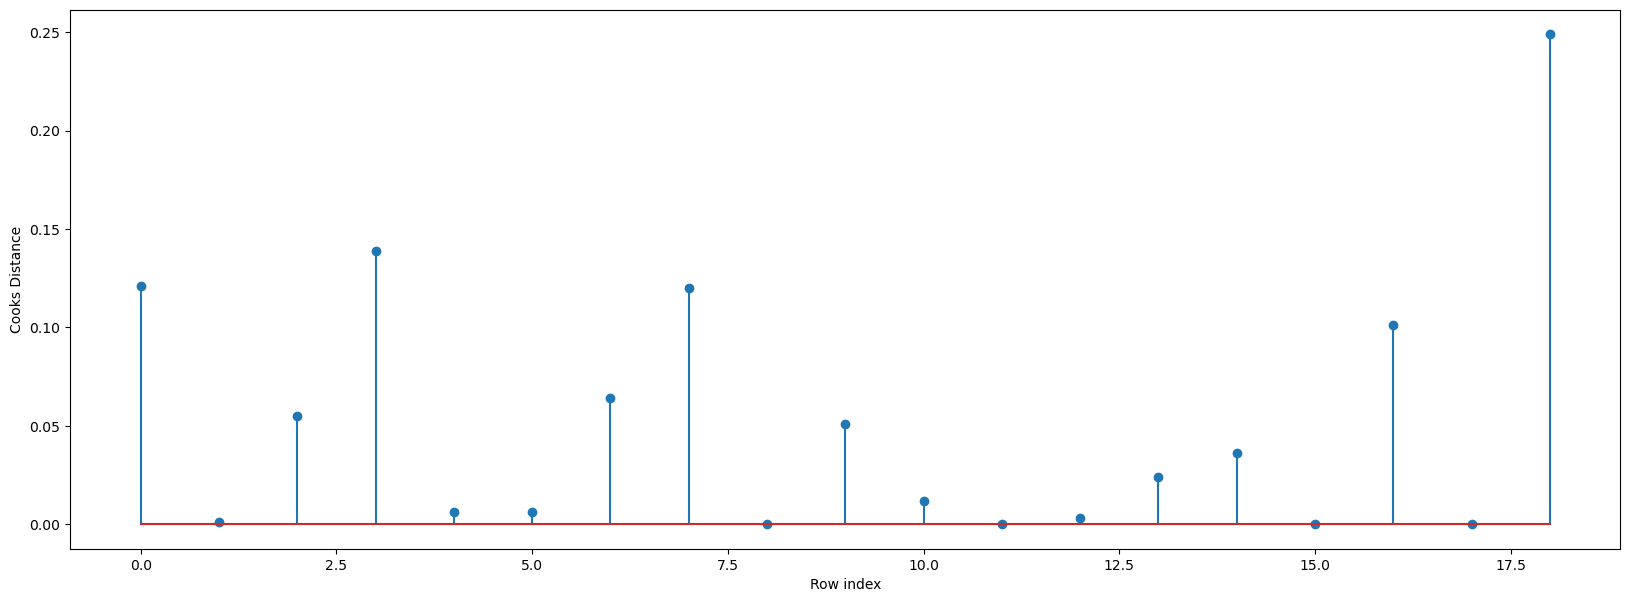

In [53]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df7)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [54]:
np.argmax(c2), np.max(c2)

(18, 0.24932621731860322)

In [55]:
df8= df7.drop([18],axis=0)

In [56]:
df9 = df8.reset_index()

In [57]:
df10 = df9.drop(['index'],axis=1)

In [58]:
model7 = smf.ols('DT~ST', data=df10).fit()

In [59]:
model7.summary()
# print('P value is:', model7.pvalues, '\n', '\n', 'Rsquared value is:',model7.rsquared, 
#       '\n', '\n', 'Rsquared value is:', model7.rsquared )

C:\Users\mruna\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     79.94
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.27e-07
Time:                        19:34:44   Log-Likelihood:                -35.450
No. Observations:                  18   AIC:                             74.90
Df Residuals:                      16   BIC:                             76.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0240      1.175      5.126      0.000       3.533       8.515
ST             1.6741      0.187      8.941      0.000       1.277       2.071
==============================================================================
Omnibus:                        1.044   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.959
Skew:                           0.447   Prob(JB):                        0.619
Kurtosis:                       2.307   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#Since r squared value has further increased, we'll try eliminating another influence point

### Iteration 7

In [61]:
model_influence = model7.get_influence()
(c3, _) = model_influence.cooks_distance

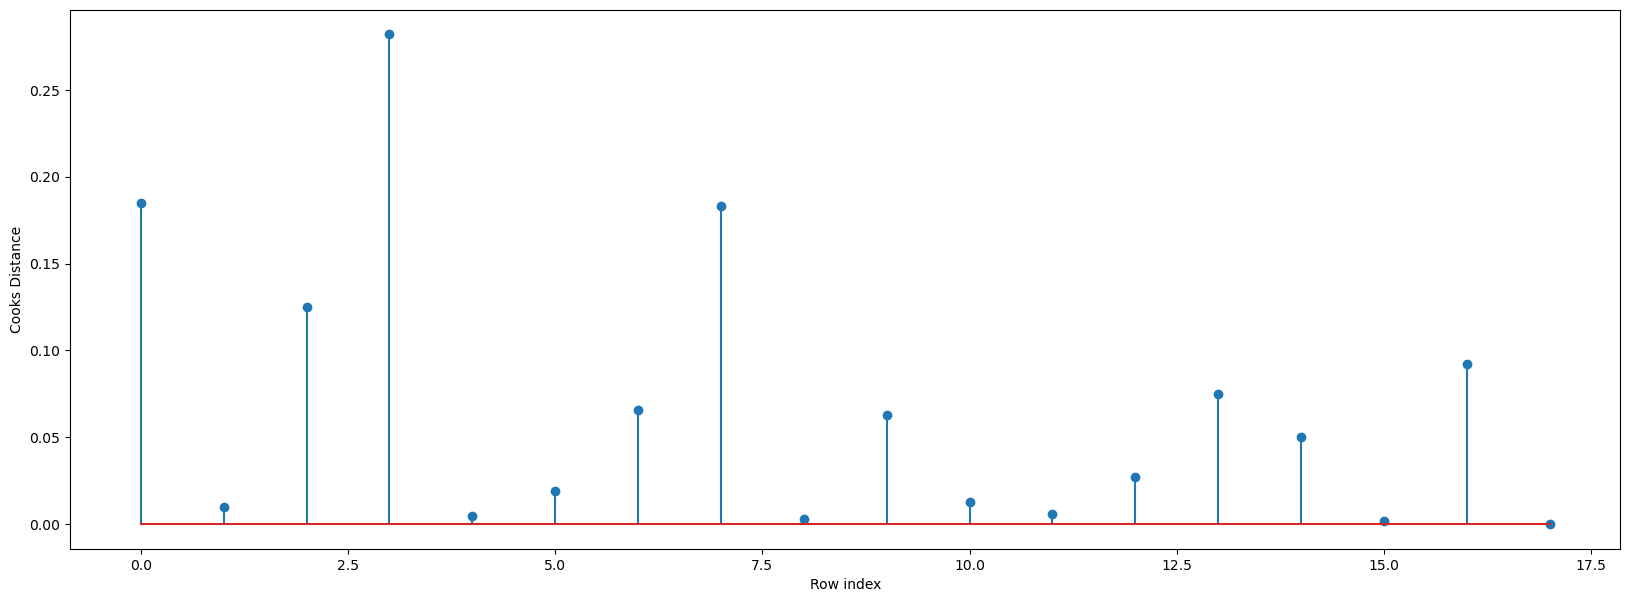

In [62]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df10)), np.round(c3, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [63]:
np.argmax(c3), np.max(c3)

(3, 0.28237359768558323)

In [64]:
df11 = df10.drop([3],axis=0)

In [65]:
df12= df11.reset_index()

In [66]:
df13= df12.drop(['index'],axis=1)

In [67]:
model8= smf.ols('DT~ST', data=df13).fit()

In [68]:
model8.summary()
# print('P value is:', model8.pvalues, '\n', '\n', 'Rsquared value is:',model8.rsquared, 
#       '\n', '\n','Adjusted Rsquared value is:', model8.rsquared )

C:\Users\mruna\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     71.20
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           4.44e-07
Time:                        19:35:36   Log-Likelihood:                -32.216
No. Observations:                  17   AIC:                             68.43
Df Residuals:                      15   BIC:                             70.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4943      1.124      5.778      0.000       4.099       8.890
ST             1.5605      0.185      8.438      0.000       1.166       1.955
==============================================================================
Omnibus:                        1.616   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                0.983
Skew:                           0.581   Prob(JB):                        0.612
Kurtosis:                       2.809   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Since r squared value has decreased, we'll not delete any influence point going further

In [69]:
#Hence the best rsquared value was at the end of iteration 6, i.e. 
print('R squared value after iteration 6',round(model7.rsquared,4))

R squared value after iteration 6 0.8332


### We can check the transformations once again with the improved dataset at the end of iteration 6

### Iteration 8

In [70]:
model9 = smf.ols('DT~ST+ST2',data=df10).fit()

In [71]:
print('R squared value after iteration 8',round(model9.rsquared,4))

R squared value after iteration 8 0.844


In [72]:
#Since there's a slight increase, we'll try for other combinations as well

### Iteration 9

In [73]:
model10= smf.ols('DT~ST+ST2+logST',data=df10).fit()

In [74]:
print('R squared value after iteration 9',round(model9.rsquared,4))

R squared value after iteration 9 0.844


### Since there's isn't any increase upto 4th decimal place, hence we can finalise the result of iteration 8 as the best model

In [75]:
df_final = df10.drop(['logST','sqrtST'],axis=1)

In [76]:
df_final.head(3)

,DT,ST,ST2
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36


In [77]:
model_final = model9

In [78]:
print(model_final.params,'\n','\n',model_final.pvalues,'\n','\n',round(model_final.rsquared,4),'\n','\n',
      round(model_final.rsquared_adj,4))

Intercept    3.473031
ST           2.700664
ST2         -0.087270
dtype: float64 
 
 Intercept    0.229684
ST           0.019084
ST2          0.326135
dtype: float64 
 
 0.844 
 
 0.8231
